In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import scipy.io as sio
from dataclasses import dataclass
from typing import List, Tuple
import os
from dotenv import load_dotenv
load_dotenv()
import tidy3d as td
from tidy3d import web
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from natsort import natsorted
import numpy as np
import matplotlib.animation as animation
import xarray as xr
import imageio
import matplotlib
import sys
import os

# Assuming /AutomationModule is in the root directory of your project
sys.path.append(os.path.abspath(r'H:\phd stuff\tidy3d'))

from AutomationModule import * 

import AutomationModule as AM

In [2]:
tidy3dAPI = os.environ["API_TIDY3D_KEY"]

In [3]:
a = 1
medium = td.Medium(permittivity=11.56)
run = True

In [4]:
file = r"H:\phd stuff\structures\SHU_2D\chi_0.30_N_10000_posics.dat"
data = []
centers = []
slicing= 0.25
# slicing= 0.1

with open(file,"r") as f: 
    lines = f.read().splitlines() 
    i=0
    index = 1
    num_samples = int(lines[index].split()[0])

    while num_samples>0 and i < 10:
        try:
            num_samples = int(lines[index].split()[0])
            info = lines[index]
            old_index = index
            index += num_samples+1
            li = (lines[old_index+1:index])
            centers = np.array([list(map(float, item.split())) for item in li])
            data += [{
                "centers":centers,
                "Lx":float(lines[old_index].split()[1]),
                "Ly":float(lines[old_index].split()[2]),
                "points":float(lines[old_index].split()[0]),
            }]
            i+=1
        except:
            num_samples = 0

In [5]:
lambdas =  a/np.array([0.28,0.31])

Configured successfully.
Simulation Parameters (wavelengths are expressed in um):
Lx: 100 Ly: 100 Lz: 107
lambda_range: 3.23 - 3.57 um 
lambdaw (pulse) 166.66666666666666 
lambda0 3.389830508474576 
Total runtime <= 90.0 ps 
dl (Cube Size) = 161.29032258064518 nm 
Time Steps = 278572
Grid Points = 247.8472 million
eps = 1


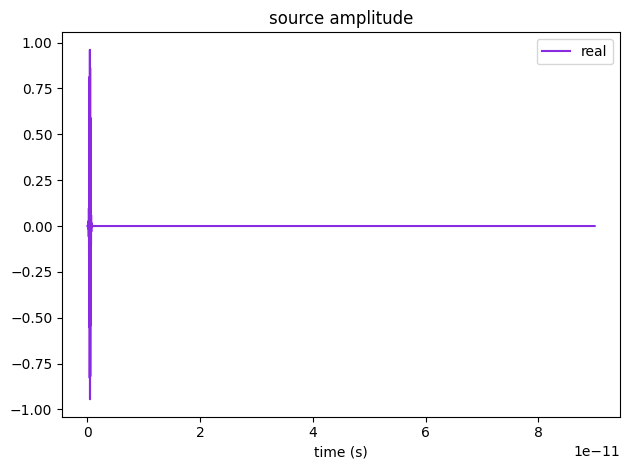

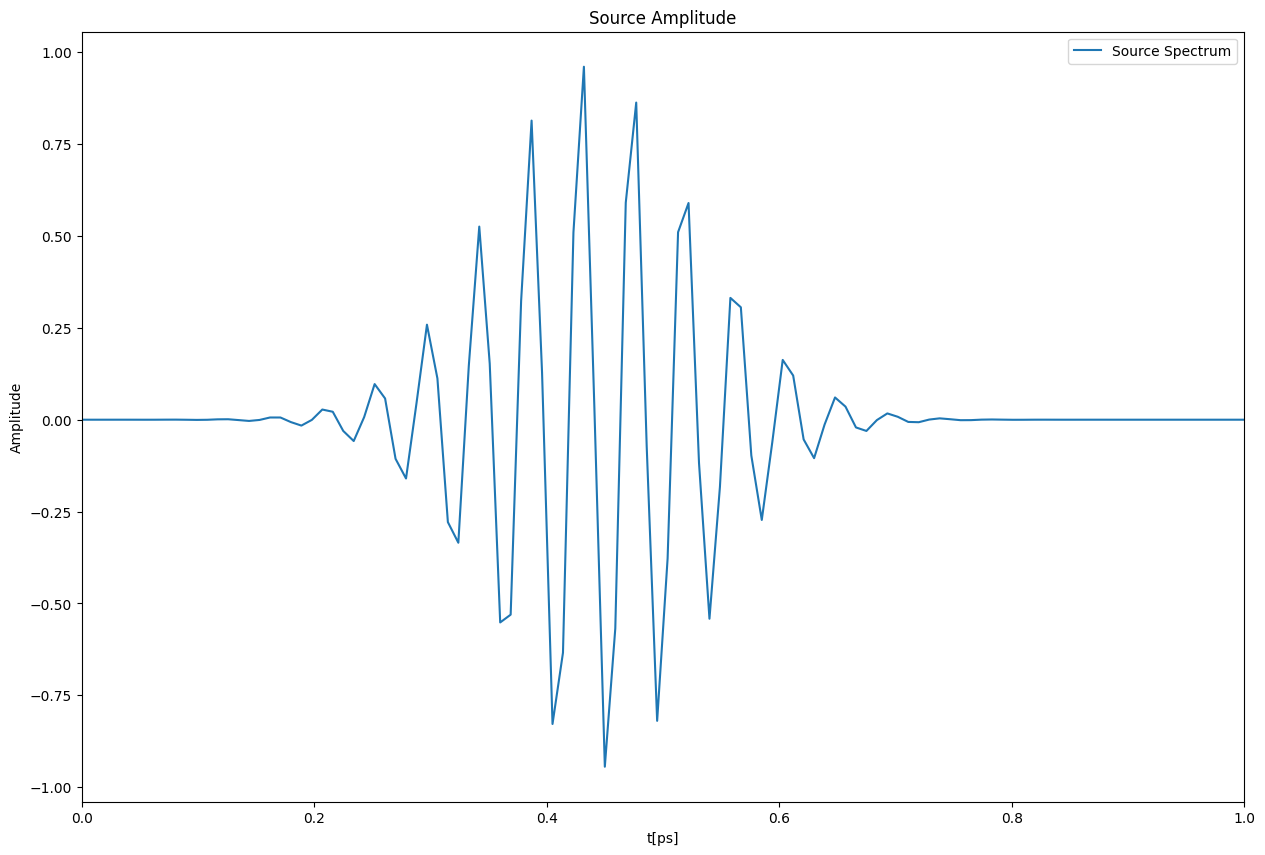

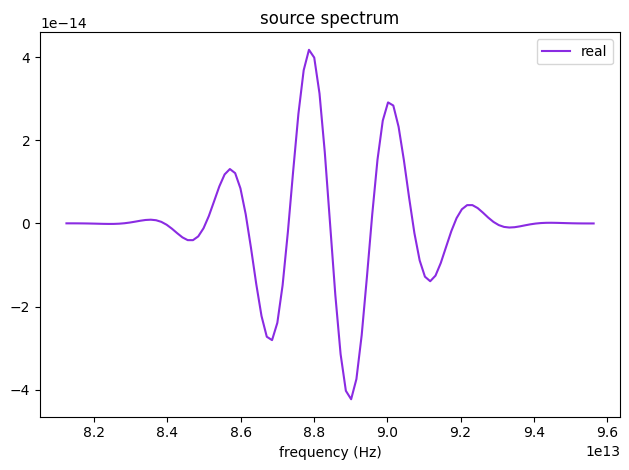

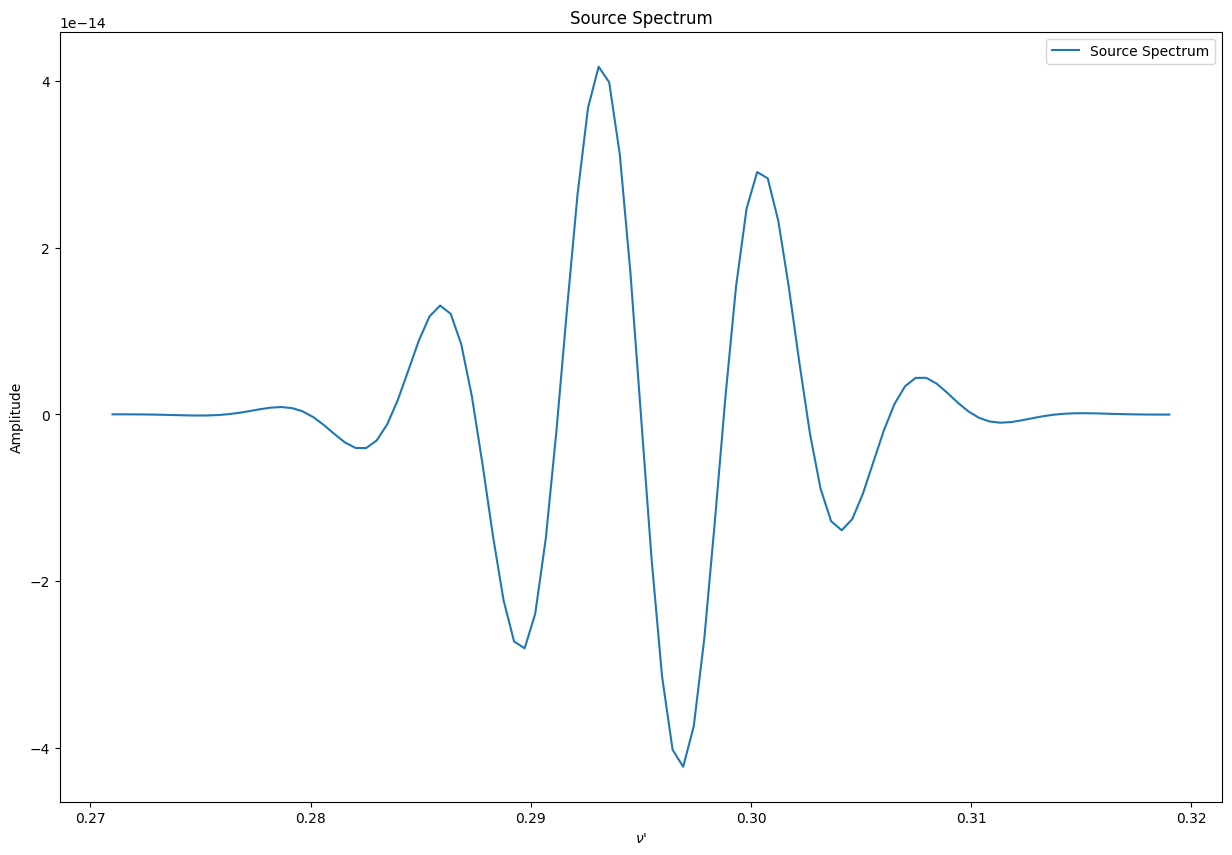

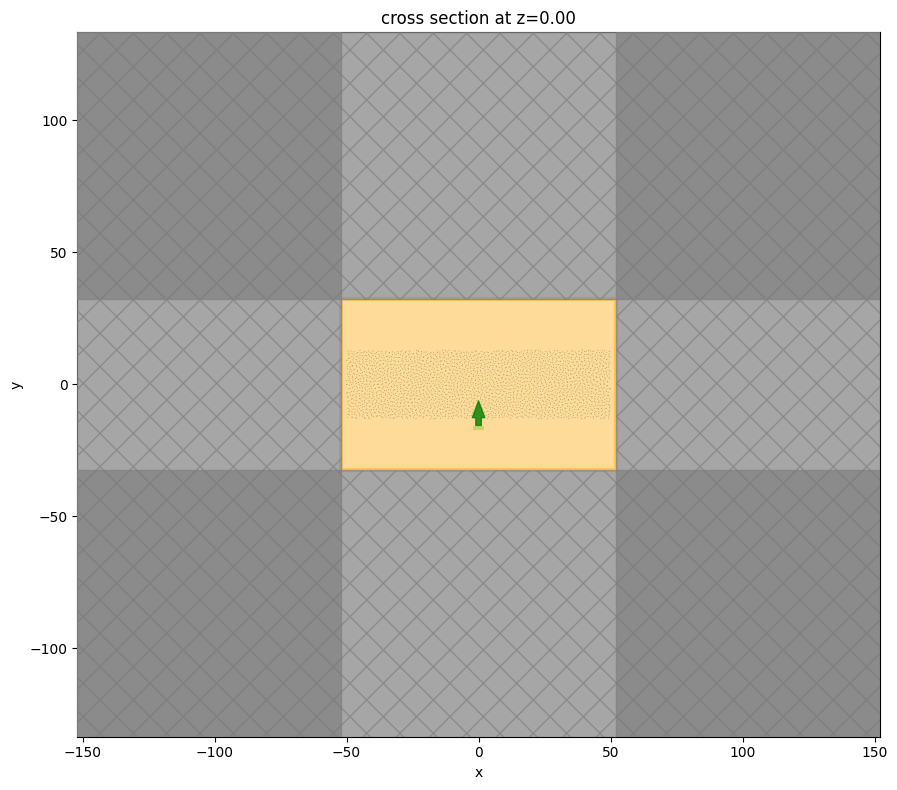

11:13:00 W. Europe Daylight Time WARNING: Monitor 'time_monitorFieldOut'        
                                 estimated storage is 14.94GB. Consider making  
                                 it smaller, using fewer frequencies, or spatial
                                 or temporal downsampling using 'interval_space'
                                 and 'interval', respectively.                  

                                 Created task 'Beam Spreading 0.28 - 0.31 -     
                                 Sample_2 90.0ps' with task_id                  
                                 'fdve-25801f6c-c907-4553-bfe2-99a9776b2961' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=361527;https://tidy3d.simulation.cloud/workbench?taskId=fdve-25801f6c-c907-4553-bfe2-99a9776b2961\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=189927;https://tidy3d.simulation.cloud/workbench?taskId=fdve-25801f6c-c907-4553-bfe2-99a9776b2961\task]8;;\
                                 ]8;id=189927;https://tidy3d.simulation.cloud/workbench?taskId=fdve-25801f6c-c907-4553-bfe2-99a9776b2961\Id]8;;\]8;id=361527;https://tidy3d.simulation.cloud/workbench?taskId=fdve-25801f6c-c907-4553-bfe2-99a9776b2961\=]8;;\]8;id=265325;https://tidy3d.simulation.cloud/workbench?taskId=fdve-25801f6c-c907-4553-bfe2-99a9776b2961\fdve]8;;\]8;id=361527;https://tidy3d.simulation.cloud/workbench?taskId=fdve-25801f6c-c907-4553-bfe2-99a9776b2961\-25801f6c-c907-4553-bfe2-99a9776b2961']8;;\.

Output()

11:13:05 W. Europe Daylight Time status = queued

                                 To cancel the simulation, use                  
                                 'web.abort(task_id)' or 'web.delete(task_id)'  
                                 or abort/delete the task in the web UI.        
                                 Terminating the Python script will not stop the
                                 job running on the cloud.

Output()

11:13:16 W. Europe Daylight Time status = preprocess

11:13:17 W. Europe Daylight Time Maximum FlexCredit cost: 0.214. Use            
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

                                 starting up solver

                                 running solver

Output()

Output()

11:16:15 W. Europe Daylight Time status = postprocess

11:27:27 W. Europe Daylight Time status = success

                                 View simulation result at                      
                                 ]8;id=933114;https://tidy3d.simulation.cloud/workbench?taskId=fdve-25801f6c-c907-4553-bfe2-99a9776b2961\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=631371;https://tidy3d.simulation.cloud/workbench?taskId=fdve-25801f6c-c907-4553-bfe2-99a9776b2961\task]8;;\
                                 ]8;id=631371;https://tidy3d.simulation.cloud/workbench?taskId=fdve-25801f6c-c907-4553-bfe2-99a9776b2961\Id]8;;\]8;id=933114;https://tidy3d.simulation.cloud/workbench?taskId=fdve-25801f6c-c907-4553-bfe2-99a9776b2961\=]8;;\]8;id=677125;https://tidy3d.simulation.cloud/workbench?taskId=fdve-25801f6c-c907-4553-bfe2-99a9776b2961\fdve]8;;\]8;id=933114;https://tidy3d.simulation.cloud/workbench?taskId=fdve-25801f6c-c907-4553-bfe2-99a9776b2961\-25801f6c-c907-4553-bfe2-99a9776b2961']8;;\.

Folder '08_23_2024 chi 0.3 N1000 Sample Beam Spreading/z_incidence' created successfully.


In [6]:
sample = 2
project_name = r"08_23_2024 chi 0.3 N1000 Sample Beam Spreading"
empty=False

runtime_ps = 90e-12
min_steps_per_lambda = 20
run_name = f"Beam Spreading {1/lambdas[0]:.3g} - {1/lambdas[1]:.3g} - Sample_{sample} {runtime_ps*1e12}ps"

for k,item in enumerate(data):
    #Tight pulse 

    if k !=sample:
        continue

    structure_1 = AM.loadAndRunStructure(key = tidy3dAPI
                ,direction="z", lambda_range=lambdas,
                box_size= data[k]['Lx']*a,runtime_ps=runtime_ps,min_steps_per_lambda=min_steps_per_lambda,
               scaling=1,shuoff_condtion=1e-20, verbose=True,
               monitors=["flux"],
               freqs=50, 
               source="planewave", 
               width=0.20, ref_only=True
               )
           
    print(structure_1.__str__())

    sim = structure_1.sim



    boundaries= td.BoundarySpec(
            x=td.Boundary(plus=td.Absorber(num_layers=600),minus=td.Absorber(num_layers=600)),
            y=td.Boundary(plus=td.Absorber(num_layers=600),minus=td.Absorber(num_layers=600)),
            z=td.Boundary.periodic(),
        )
    sim = sim.copy(update={'boundary_spec':boundaries})
    sim = sim.copy(update={'sources':[]})
    sim = sim.copy(update={'monitors':[]})


    Lx, Ly = data[k]['Lx']+4,data[k]['Ly']*slicing+40
    sim = sim.copy(update={'size':[Lx,Ly,0]})

    source = td.PlaneWave(
            source_time = td.GaussianPulse(
                freq0=structure_1.freq0,
                fwidth=structure_1.freqw
            ),
            size= (4,0,td.inf),
            center=(0,-(Lx)*slicing/2 - lambdas[0],0),
            direction='+',
            pol_angle=np.pi/2,
            name='planewave',
            )


    # source = td.GaussianBeam(
    #         source_time = td.GaussianPulse(
    #             freq0=structure_1.freq0,
    #             fwidth=structure_1.freqw
    #         ),
    #         size= (td.inf,0,td.inf),
    #         center=(0,-(Lx)*slicing/2-0.5,0),
    #         direction='+',
    #         waist_radius=2,
    #         pol_angle=np.pi/2,
    #         name='planewave',
    #         )

    
    ax1 = source.source_time.plot(times=np.linspace(0,structure_1.t_stop, 10000))

    # Extract the data from the Axes object
    line = ax1.get_lines()[0]
    times = line.get_xdata()
    amplitude = line.get_ydata()

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.plot(times*1e12, amplitude)
    ax.set_xlabel(r"t[ps]")
    ax.set_ylabel('Amplitude')
    ax.set_title('Source Amplitude')
    ax.legend(['Source Spectrum'])
    plt.xlim(0,1)
    #plt.savefig(f'{store_path}/source_time.pdf', format='pdf')
    plt.show()
    
    ax2=source.source_time.plot_spectrum(times=np.linspace(0, structure_1.t_stop, 10000))
     #Extract the data from the Axes object
    c = td.C_0 
    line = ax2.get_lines()[0]
    freqs = line.get_xdata()
    amplitude = line.get_ydata()

    # Convert frequency to wavelength (in meters)
    wavelengths = c / freqs

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.plot(a/wavelengths, amplitude)
    ax.set_xlabel(r"$\nu$'")
    ax.set_ylabel('Amplitude')
    ax.set_title('Source Spectrum')
    ax.legend(['Source Spectrum'])
    #plt.savefig(f'{store_path}/source_freqs.pdf', format='pdf')
    plt.show()
    
    sim = sim.copy(update={'sources':[source]})

    time_monitorFieldOut = td.FieldTimeMonitor(
                center = (0,0,0),
                size = (Lx,Ly,0),
                    start=0,
                    stop=structure_1.t_stop,
                    interval=50,
                    fields=["Ex", "Ey", "Ez"],
                    name="time_monitorFieldOut",
                    
                )
    

    freq_monitorFieldOut = td.FieldMonitor(
                center = (0,0,0),
                size = (td.inf, Ly,0),
                   freqs =structure_1.monitor_freqs,
                    fields=["Ex", "Ey", "Ez"],
                    name="freq_monitorFieldOut",
                    
                )

    
    time_monitorT = td.FluxTimeMonitor(
                    center = (
                            0,(Lx*slicing)/2+3,0
                            ),
                size = (
                   td.inf,0,td.inf
                    ),
                    interval = 200,
                    name="time_monitorT",

                )
    
    sim = sim.copy(update={'monitors':[time_monitorFieldOut]})
    
    slab_1 = td.Structure(
                    geometry=td.Box(
                        center= (0,(Ly/2+Lx*slicing/2)/2,0),
                        size=(td.inf,(Ly/2-Lx*slicing/2),td.inf),
                    ),
                    
                    medium=medium,
                    name='slab1',
                    )

    slab_2 = td.Structure(
                    geometry=td.Box(
                        center= (0,-(Ly/2+Lx*slicing/2)/2,0),
                        size=(td.inf,(Ly/2-Lx*slicing/2),td.inf),
                    ),
                    medium=medium,
                    name='slab2',
                    )
    
    cyl_group = []
    for x,y in data[k]['centers']:
        if np.abs(y)<=(Lx/2)*slicing:
            cyl_group.append(td.Cylinder(center=[x, y, 0], radius=0.189, length=td.inf))

    cylinders = td.Structure(geometry=td.GeometryGroup(geometries=cyl_group), medium=medium)


    if empty:
        sim = sim.copy(update={'structures':[]})
    else:
        sim = sim.copy(update={'structures':[cylinders]})
    fig, ax = plt.subplots(1, tight_layout=True, figsize=(16, 8))
    sim.plot(z=0, ax=ax)
    plt.show()

    if run:

        # sim_name = f"pnas_d_t_Localization {1/lambdas[0]:.3g} - {1/lambdas[1]:.3g} - Sample_{k}"
        sim_name = run_name
        id =web.upload(sim, folder_name=project_name,task_name=sim_name, verbose=True)
        web.start(task_id = id)
        web.monitor(task_id=id,verbose=True)
        ids = '\n' + id
        incidence_folder = "z_incidence"
        file_path = f"data/{project_name}/{incidence_folder}/{sim_name}.txt"
        # Check if the folder exists
        if not os.path.exists( f"data/{project_name}/{incidence_folder}"):
            os.makedirs(f"data/{project_name}/{incidence_folder}")
            print(f"Folder '{project_name}/{incidence_folder}' created successfully.")

        # Open file in write mode
        with open(file_path, "w") as file:
            # Write the string to the file
            file.write(ids)

